In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('cleandata.csv')
data = data.drop(data.columns[0], axis=1)

important_columns = ['timeknown', 'age', 'education', 'temperature', 'bloodchem4', 'urine', 'psych5', 'blood', 'cost', 'death']

data = data[important_columns]

target_variable = 'death'

encoding_maps = {}

X = data.drop('death', axis=1)
y = data['death']

numerical_columns = X.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X[numerical_columns] = X[numerical_columns].fillna(0)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.dtypes

timeknown      float64
age            float64
education      float64
temperature    float64
bloodchem4     float64
urine          float64
psych5         float64
blood          float64
cost           float64
dtype: object

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3234, number of negative: 1578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672070 -> initscore=0.717562
[LightGBM] [Info] Start training from score 0.717562


LGBMClassifier()

In [ ]:
model1 = lgb.LGBMClassifier()
model1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3234, number of negative: 1578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672070 -> initscore=0.717562
[LightGBM] [Info] Start training from score 0.717562


LGBMClassifier()

In [ ]:
model2 = lgb.LGBMClassifier()
model2.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3234, number of negative: 1578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 4812, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672070 -> initscore=0.717562
[LightGBM] [Info] Start training from score 0.717562


LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
norm_conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')

accuracy


0.915282392026578

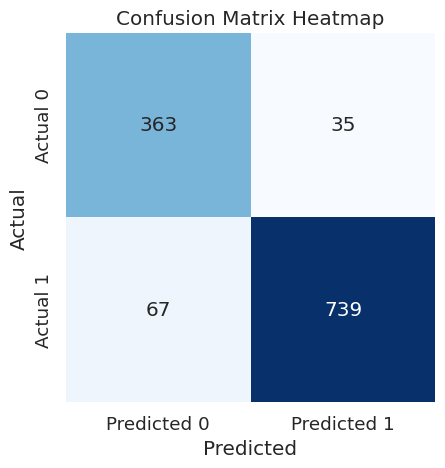

In [ ]:
sns.set(font_scale=1.2)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()

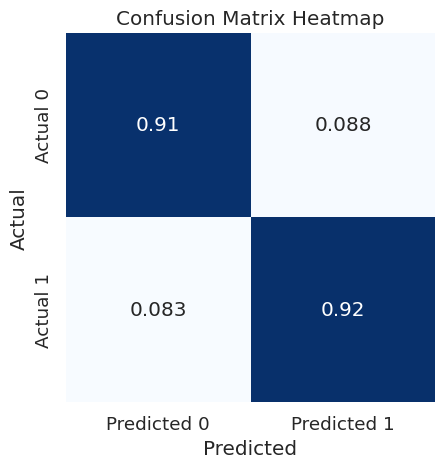

In [ ]:
sns.set(font_scale=1.2)

# Create a heatmap of the confusion matrix
sns.heatmap(norm_conf_matrix, annot=True, cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

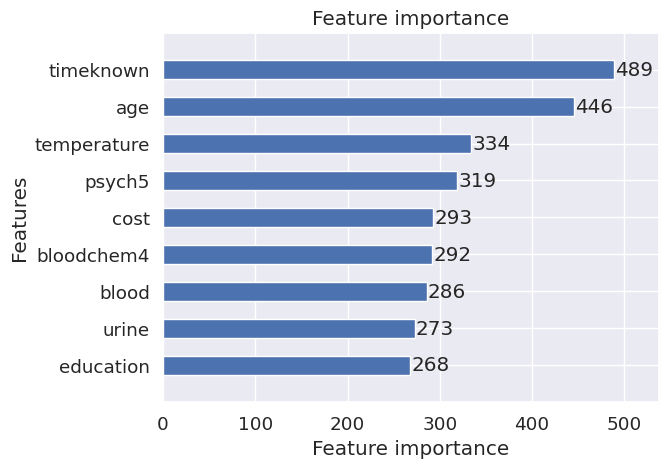

In [ ]:
#feature importances

lgb.plot_importance(model, height = 0.5)

In [ ]:
shap.__version__

'0.43.0'

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
explainer_new = shap.Explainer(model, X)
new_shap_values = explainer_new(X)

100%|===================| 5989/6016 [00:54<00:00]       

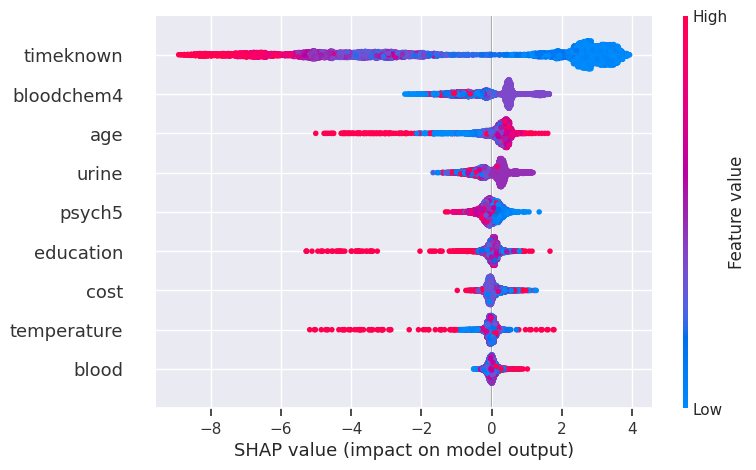

In [ ]:
shap.plots.beeswarm(new_shap_values)

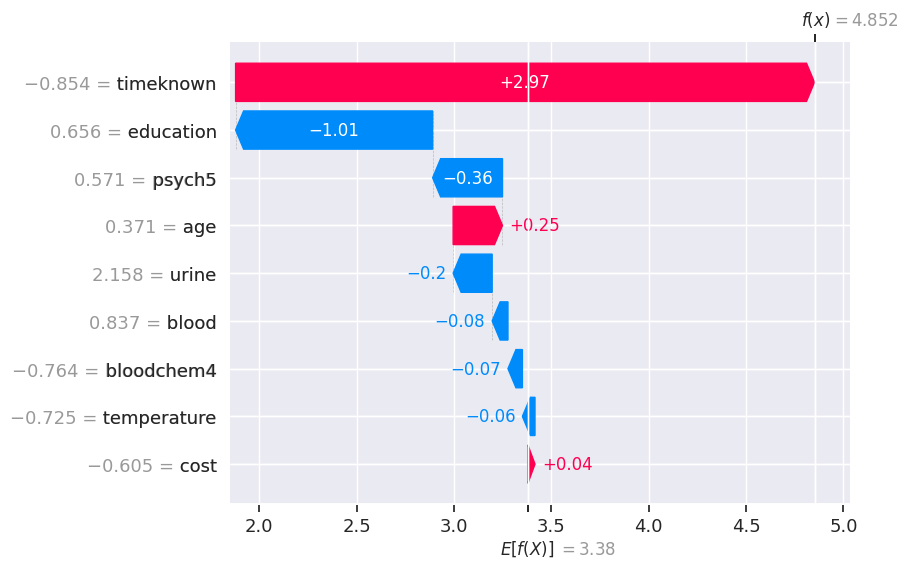

In [ ]:
shap.plots.waterfall(new_shap_values[0])

In [ ]:
false_positive_indices = []
actual_labels_intermediate = y_test.tolist()
actual_labels = [int(i) for i in actual_labels_intermediate]

for index, prediction in enumerate(y_pred):
  true_val = actual_labels[index]
  if true_val == 1 and prediction == 0:
    false_positive_indices.append(index)

false_positive_indices

[1,
 17,
 30,
 47,
 50,
 56,
 64,
 89,
 100,
 110,
 158,
 161,
 172,
 221,
 222,
 266,
 268,
 271,
 277,
 390,
 393,
 400,
 401,
 407,
 413,
 434,
 436,
 445,
 453,
 476,
 515,
 567,
 578,
 580,
 589,
 596,
 605,
 619,
 629,
 639,
 643,
 648,
 656,
 710,
 725,
 746,
 765,
 767,
 861,
 866,
 867,
 887,
 913,
 914,
 923,
 930,
 960,
 972,
 1035,
 1057,
 1069,
 1073,
 1105,
 1124,
 1127,
 1128,
 1184]

In [ ]:
from operator import neg
for fp_index in false_positive_indices:
  shap_plot = shap.plots.waterfall(new_shap_values[fp_index])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
shap.dependence_plot(0, new_shap_values)

AttributeError: ignored

In [ ]:
shap.summary_plot(shap_values, X, plot_type='bar')


In [ ]:
afpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

In [ ]:
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2)
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()


===================================================================================================================

In [ ]:
model.booster_.save_model('your_model_file.txt')